# Notes
* Two possible directions: train a single multi-output regression model (which predicts a matrix of form ```i=[[a1, b1, c1], [a2, b2, c2], [a3, b3, c3]]```, a triplet of multi-output regression models that predict matrices of form ```j=[a, b, c]```, or a set of nine regression models that each predict a value in ```i.flatten()```

# Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from keras import models, layers
import tensorflow as tf
from sklearn.metrics import confusion_matrix

np.set_printoptions(suppress=True)
data_df = pd.read_csv('https://github.com/personal-research/MAXI-J1535/raw/main/data/processed/full.csv')

In [17]:
data_df = data_df.sample(frac=1) # shuffle the dataframe

def normalize(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

# X

arr_names =  ['hardness', 'tins', 'disk_norm', 'gammas', 'nthcomp_norms', 'intensities']
(hardness, tins, disk_norms, gammas, nthcomp_norms, intensities) = (normalize(np.array(data_df[arr_name])) for arr_name in arr_names)

## Stack x values
x_vals = np.array([], dtype=np.int64).reshape(0,6)

for a, b, c, d, e, f in zip(hardness, tins, disk_norms, gammas, nthcomp_norms, intensities): 
    new_arr = np.array([float(a), float(b), float(c), float(d), float(e), float(f)])
    x_vals = np.vstack([x_vals, new_arr])

# Y 
y_vals = np.array([], dtype=np.float32).reshape(0, 3)

freq1s, freq2s, freq3s = (normalize(np.array(data_df[arr_name])) for arr_name in ['first_par1s', 'second_par1s', 'third_par1s'])

for freq1, freq2, freq3 in zip(freq1s, freq2s, freq3s): 
    new_arr = np.array([float(freq1), float(freq2), float(freq3)])
    y_vals = np.vstack([y_vals, new_arr])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.2)

In [5]:
def get_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu')) # fix this line
    model.add(layers.Dense(10, activation='relu')) 
    model.add(layers.Dense(3, activation='linear'))
    opt = tf.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='mse', metrics='mae')

    return model

In [32]:
model = get_model()
epochs = 3000
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=epochs, batch_size=25, verbose=0)

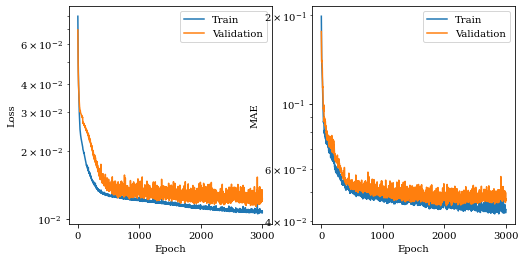

In [33]:
#Evaluate model
hist = history.history
epochs_arr = np.array(range(1, epochs+1))

train_loss = hist['loss']
val_loss = hist['val_loss']

train_mae = hist['mae']
val_mae = hist['val_mae']

# Make plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
plt.rcParams['font.family']='serif'

axs[0].plot(epochs_arr, train_loss, label='Train')
axs[0].plot(epochs_arr, val_loss, label='Validation')
axs[0].set(xlabel='Epoch', ylabel='Loss')
axs[0].legend()

axs[1].plot(epochs_arr, train_mae, label='Train')
axs[1].plot(epochs_arr, val_mae, label='Validation')
axs[1].set(xlabel='Epoch', ylabel='MAE')
axs[1].legend()

for ax in (axs[0], axs[1]):
    ax.set(yscale='log')

plt.show()

In [25]:
model = get_model()
epochs = 1500
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=epochs, batch_size=25, verbose=0)
results = model.evaluate(X_test, y_test)

predictions = model.predict(X_test)
'''
y_pred = np.array([]).astype(int)

labels = [0, 1, 2, 3]

for row in predictions: 
    idx = np.argmax(row)
    y_pred = np.append(y_pred, labels[idx])

print(y_pred)
'''
print(results)

2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - mae: 0.0307
[0.007011593785136938, 0.03068402037024498]


In [21]:
print(y_test)
print(predictions)

[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.35010847 0.45640422 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.81066296 0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.26269904 0.3349727  0.47702596]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.62876732 0.82877142 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.65717507 0.84728638 0.        ]
 [0.         0.         0.        ]
 [0.84729019 0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.  

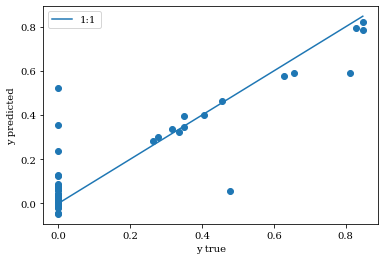

In [26]:
flat_y_test = y_test.flatten()
flat_y_pred = predictions.flatten()

x_line = np.linspace(min(flat_y_test), max(flat_y_test), 3)

plt.scatter(flat_y_test, flat_y_pred)
plt.plot(x_line, x_line, label='1:1')
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.legend()

plt.show()